# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

#import api_key
from config import api_key

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# import API Key from config file
from config import api_key
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_list_coors = []
city_counter_set = 1
city_count = 1

#for loop to iterate through each city within cities
for city in cities:
    citypy_url = url + "&q=" + city
    # print the list of cities
    print (f"Processing Record {city_count} of Set {city_counter_set} | {city}")      
    
    # if statement that display each city, 
    # row per row and will count up to 50 and restart
    if city_count <= 50:
       city_count += 1
    
    #restart the counter
    else:
        city_counter_set += 1
        city_count = 1
        
    #get API request for each city within cities
    try:
        # Parse the JSON and retrieve data
        city_climate = requests.get(citypy_url).json()
        # return the API parameters for each looped city with lat and long
        city_list_lat = city_climate ["coord"] ["lat"]
        city_list_lon = city_climate ["coord"] ["lon"]
        city_list_temp = city_climate ["main"] ["temp"]
        city_list_humidity = city_climate ["main"] ["humidity"]
        city_list_clouds = city_climate ["clouds"] ["all"]
        city_list_wind = city_climate ["wind"] ["speed"]
        city_list_country = city_climate ["sys"] ["country"]
        city_list_city_date = city_climate ["dt"]

        # append the climate parameters to the city list
        city_list_coors.append ({
            "City": city,
            "Country": city_list_country,
            "Latitude": city_list_lat,
            "Longitude": city_list_lon,
            "Temperature": city_list_temp,
            "Humidity": city_list_humidity,
            "Cloudiness": city_list_clouds,
            "Wind_Speed": city_list_wind,
            "Date": city_list_city_date
        })


    # Skip the city not found
    except:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | asau
City not found. Skipping...
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | belomorsk
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | whitehorse
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | ahuimanu
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | jalapa
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | rio gallegos
Processing Record 21 of Set 1 | sisimiut
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | illoqqortoormiut
City not found. Skipping...

Processing Record 34 of Set 4 | isla mujeres
Processing Record 35 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 4 | hirara
Processing Record 37 of Set 4 | chaohu
Processing Record 38 of Set 4 | ust-ishim
Processing Record 39 of Set 4 | halalo
City not found. Skipping...
Processing Record 40 of Set 4 | bom jesus do itabapoana
Processing Record 41 of Set 4 | srednekolymsk
Processing Record 42 of Set 4 | shingu
Processing Record 43 of Set 4 | paamiut
Processing Record 44 of Set 4 | north platte
Processing Record 45 of Set 4 | chumikan
Processing Record 46 of Set 4 | zhezkazgan
Processing Record 47 of Set 4 | maniitsoq
Processing Record 48 of Set 4 | skjervoy
Processing Record 49 of Set 4 | felidhoo
City not found. Skipping...
Processing Record 50 of Set 4 | longyearbyen
Processing Record 51 of Set 4 | papara
Processing Record 1 of Set 5 | betong
Processing Record 2 of Set 5 | samarai
Processing Record 3 of Set 5 | kazalinsk
City not found. Skipping...
Processi

Processing Record 16 of Set 8 | port-cartier
Processing Record 17 of Set 8 | muzaffarnagar
Processing Record 18 of Set 8 | takoradi
Processing Record 19 of Set 8 | pevek
Processing Record 20 of Set 8 | sonoita
Processing Record 21 of Set 8 | bull savanna
Processing Record 22 of Set 8 | kang
Processing Record 23 of Set 8 | dum duma
Processing Record 24 of Set 8 | douentza
Processing Record 25 of Set 8 | baracoa
Processing Record 26 of Set 8 | chyhyryn
Processing Record 27 of Set 8 | iracoubo
Processing Record 28 of Set 8 | high level
Processing Record 29 of Set 8 | la macarena
Processing Record 30 of Set 8 | ranong
Processing Record 31 of Set 8 | kabinda
Processing Record 32 of Set 8 | moron
Processing Record 33 of Set 8 | kapit
Processing Record 34 of Set 8 | mackay
Processing Record 35 of Set 8 | shenjiamen
Processing Record 36 of Set 8 | pemangkat
City not found. Skipping...
Processing Record 37 of Set 8 | pisco
Processing Record 38 of Set 8 | necochea
Processing Record 39 of Set 8 |

Processing Record 48 of Set 11 | omaha
Processing Record 49 of Set 11 | laguna
Processing Record 50 of Set 11 | antofagasta
Processing Record 51 of Set 11 | turukhansk
Processing Record 1 of Set 12 | dubbo
Processing Record 2 of Set 12 | playa del carmen
Processing Record 3 of Set 12 | safford
Processing Record 4 of Set 12 | igrim
Processing Record 5 of Set 12 | irbeyskoye
Processing Record 6 of Set 12 | cap-aux-meules
Processing Record 7 of Set 12 | coquimbo
Processing Record 8 of Set 12 | hays
Processing Record 9 of Set 12 | lakes entrance
Processing Record 10 of Set 12 | elbrus
Processing Record 11 of Set 12 | la rioja
Processing Record 12 of Set 12 | burica
City not found. Skipping...
Processing Record 13 of Set 12 | mehamn
Processing Record 14 of Set 12 | nizhniy mamon
Processing Record 15 of Set 12 | christchurch
Processing Record 16 of Set 12 | vostok
Processing Record 17 of Set 12 | itarema
Processing Record 18 of Set 12 | ugoofaaru
Processing Record 19 of Set 12 | port hedland

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create DataFrame from the results above and display it
city_list_df = pd.DataFrame(city_list_coors)
city_list_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind_Speed
0,atuona,92,PF,1552530281,100,-9.80,-139.03,82.36,13.44
1,cape town,0,ZA,1552530189,88,-33.93,18.42,65.70,12.75
2,souillac,0,FR,1552530310,87,45.60,-0.60,44.62,6.93
3,rikitea,100,PF,1552530253,100,-23.12,-134.97,74.49,26.53
4,tiksi,68,RU,1552530294,83,71.64,128.87,-2.47,4.05


In [16]:
# Export the city data into a .csv.
city_list_df.to_csv("cityweather.csv")

city_list_df.count()

City           576
Cloudiness     576
Country        576
Date           576
Humidity       576
Latitude       576
Longitude      576
Temperature    576
Wind_Speed     576
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

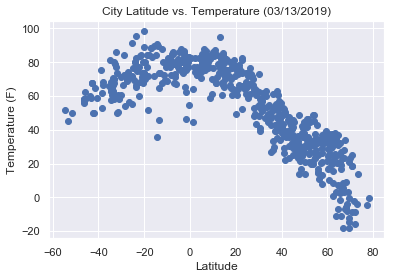

In [17]:
# I will use the seaborn lib to add styling to my plots
import seaborn
seaborn.set()

plt.scatter(city_list_df.Latitude, city_list_df.Temperature)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Temperature (03/13/2019)")
plt.savefig("latitude_temp.png")
plt.show()

#### Latitude vs Temperature Observations

Looking at the lats and temps results of 03/13 the trend shows a downward arc, the highest concentration of cities is between latitudes 0 and 60 degrees, with a temperature range of 20F - 80F degrees.

------------------------------------------------------------------------------

#### Latitude vs. Humidity Plot

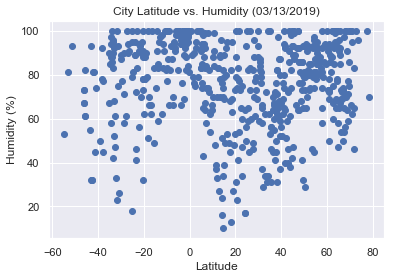

In [18]:
plt.scatter(city_list_df.Latitude, city_list_df.Humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (03/13/2019)")
plt.savefig("latitude_humidity.png")
plt.show()

#### Latitude vs Humidity Observations 

The results of 03/13 show the highest concentration of cities have a humidity range between 60% to 100%. 

------------------------------------------------------------------------------

#### Latitude vs. Cloudiness Plot

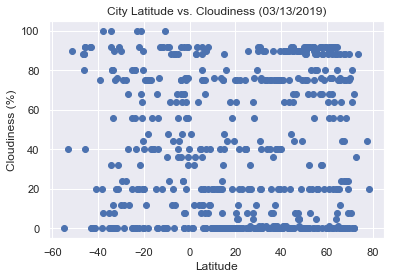

In [19]:
plt.scatter(city_list_df.Latitude, city_list_df.Cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (03/13/2019)")
plt.savefig("latitude_clouds.png")
plt.show()

#### Latitude vs Cloudiness Observations

The cloudiness plot has no discerning pattern, cities are scattered throughout the entire 0% to 100% range 

------------------------------------------------------------------------------

#### Latitude vs. Wind Speed Plot

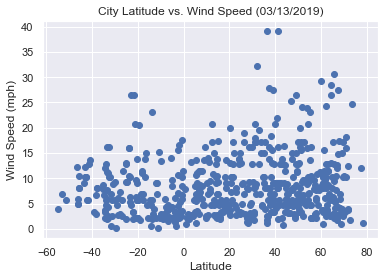

In [21]:
plt.scatter(city_list_df.Latitude, city_list_df.Wind_Speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (03/13/2019)")
plt.savefig("latitude_windspeed.png")
plt.show()

#### Latitude vs Wind Speed Observations

Most cities have wind speeds between 0 mph to 15 mph, with latitude ranging as well, from -40 to 70 degrees